# SLR Practice

### Imports

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.stats.stattools import durbin_watson


### Get the data

In [111]:
df = pd.read_csv('./data/train.csv')

In [112]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I always fix my column names first. 

new_column_names = []
for name in df.columns:
    new_column_name = name.strip().lower()
    new_column_names.append(new_column_name)

df.columns = new_column_names

In [113]:
# list comp!
#strip white space and convert to lowercase all the column names
df.columns = [name.strip().lower() for name in df.columns]

In [114]:
# Check it out
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

I'll create an SLR using one feature and `saleprice` as the target.

In [116]:
# Create target/output and features/input
#grlivarea
X = df[['grlivarea']]

#saleprice
y = df['saleprice']

In [117]:
type(X)

pandas.core.frame.DataFrame

In [118]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


In [119]:
X.shape

(1460, 1)

In [120]:
type(y)

pandas.core.series.Series

In [121]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

In [122]:
y.shape

(1460,)

### Assumption: Linear Relationship between feature and target

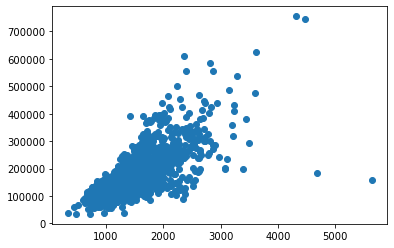

In [123]:
# Assumption #1. Check to see if there is a linear relationship
plt.scatter(X,y)

In [124]:
%matplotlib inline

<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

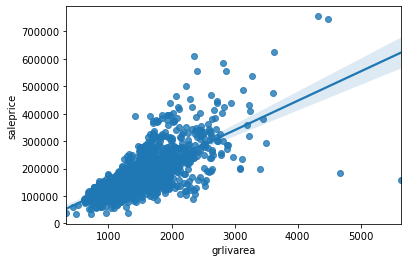

In [125]:
# another method sns.regplot
sns.regplot(x=X, y=y)

In [126]:
# Create a correct number of bins, and let's look at the distribution
bins = int(len(X)**.5)
bins

38

In [127]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


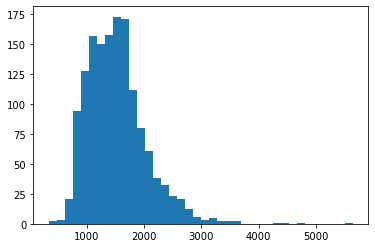

In [128]:
# And for Sale price, as well
plt.hist(X['grlivarea'], bins=bins);

(array([  7.,  16.,  66., 101., 171., 240., 167., 170., 121.,  79.,  83.,
         52.,  49.,  23.,  29.,  22.,  11.,  10.,  13.,   7.,   5.,   4.,
          3.,   2.,   1.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  53850.,  72800.,  91750., 110700., 129650., 148600.,
        167550., 186500., 205450., 224400., 243350., 262300., 281250.,
        300200., 319150., 338100., 357050., 376000., 394950., 413900.,
        432850., 451800., 470750., 489700., 508650., 527600., 546550.,
        565500., 584450., 603400., 622350., 641300., 660250., 679200.,
        698150., 717100., 736050., 755000.]),
 <BarContainer object of 38 artists>)

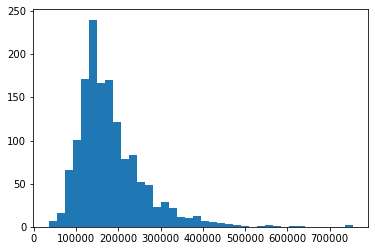

In [129]:
plt.hist(y, bins=bins)

What does this tell us?

In [130]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

In [131]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


In [132]:
formula = 'saleprice ~ grlivarea'

In [133]:
sm_lr_formula = sm.formula.ols(formula=formula, data=df)

In [134]:
sm_lr_formula.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.52e-223
Time:                        15:56:44   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
# statsmodel first
sm_lr = sm.OLS(y, sm.add_constant(X))

In [140]:
sm_lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.52e-223
Time:                        15:58:31   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
sm_lr2 = sm.OLS(y, X)

In [142]:
sm_lr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        15:58:34   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grlivarea    118.0691      0.920    128.337      0.000     116.264     119.874
==============================================================================
Omnibus:                      242.301   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.101
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      11.504   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Summary


### How do we compare this?

Baseline!

There's a [class](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) for it!

In [143]:
# Instantiate
dummy_lr = DummyRegressor()

In [144]:
# fit
dummy_lr.fit(X,y)

DummyRegressor()

In [145]:
# score
dummy_lr.score(X,y)

0.0

Well that's a relief. We're at least better then that.

### Error assumptions

#### Normally Distributed with a mean of 0

In [152]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: saleprice, Length: 1460, dtype: int64

In [153]:
y_test = df[['saleprice']] 
#not what we want to use! We just want to have the target as a one-dimensional array as we see in y, 
#not as a pandas dataframe as we see in y_test

In [154]:
# Instantiate
sk_lr = LinearRegression()

In [156]:
X = df[['grlivarea']] #want a pandas dataframe to have a two-dimensional array which is the shape scikitlearn wants

In [157]:
sk_lr.fit(X,y)

LinearRegression()

In [158]:
# score
sk_lr.score(X,y)

0.5021486502718042

In [159]:
# predict
preds = sk_lr.predict(X)

In [160]:
preds

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [162]:
# alternative way if we had used y_test instead
#y_test['saleprice'] - preds

In [163]:
len(preds)

1460

In [164]:
# calculate residuals
resids = y - preds

In [165]:
resids

0        6738.060312
1       27732.461129
2       13596.153031
3      -62511.852201
4       -4041.554863
            ...     
1455   -20012.727073
1456   -30650.259993
1457    -2754.065837
1458     8069.447178
1459    -5624.756718
Name: saleprice, Length: 1460, dtype: float64

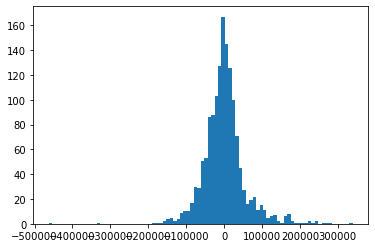

In [166]:
# Histogram of residuals
plt.hist(resids, bins='auto');

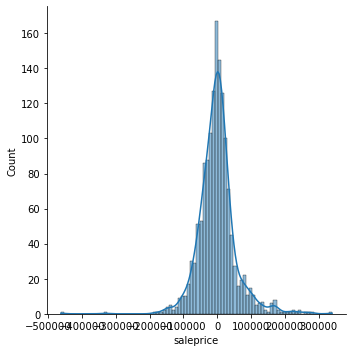

In [167]:
# sns
sns.displot(resids, bins='auto', kde=True)

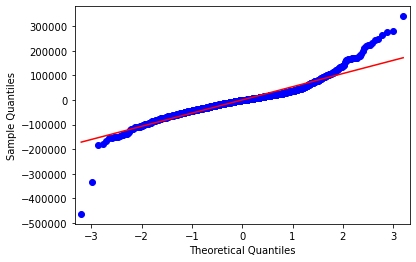

In [168]:
# QQ!
sm.qqplot(resids, line='r');

#### Thoughts?

#### Heteroskedacity

In [ ]:
# resid plot sns.resid


In [ ]:
# scatter


#### Thoughts?

#### No autocorrelation in residuals

Hello, [Durbin-Watson!](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

In [ ]:
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(resids)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

The above code was audaciously stolen from [this](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) excellent article.

#### Thoughts?

## Your turn!

Your goal is find a feature or an interaction of features that outperforms this model. GO!